In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
ls

drive/  sample_data/


In [3]:
cd drive/MyDrive/

/content/drive/MyDrive


In [4]:
ls


604/  612/  707/  708/  709/  713/  716/  AI.drawio  library.db


In [5]:
cd 713/

/content/drive/MyDrive/713


In [6]:
ls

'12.0 Methods for Urban Air Pollution.txt'         'PMF_Raw Date_QueenSt_PM10'/   Test1.csv
'Methods for Urban Air Pollution—Key words.ipynb'   Raw/                         'Test 1.ipynb'
 PM10.csv                                           STATES.csv                    Untitled0.ipynb


In [7]:
cd PMF_Raw Date_QueenSt_PM10/

/content/drive/MyDrive/713/PMF_Raw Date_QueenSt_PM10


In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
df = pd.read_excel("PMF_Raw Date_QueenSt_PM10.xlsx")

In [69]:
# Replace all missing values with 0
df.fillna(0, inplace=True)

# Save the modified DataFrame back to an Excel file
df.to_excel('PMF_Raw Date_QueenSt_PM10.xlsx', index=False)

In [70]:
dtypes = df.dtypes
print(dtypes)

**** Error Estimation Summary ****    object
Unnamed: 1                            object
Unnamed: 2                            object
Unnamed: 3                            object
Unnamed: 4                            object
Unnamed: 5                            object
Unnamed: 6                            object
Unnamed: 7                            object
Unnamed: 8                            object
Unnamed: 9                            object
Unnamed: 10                           object
Unnamed: 11                            int64
Unnamed: 12                           object
Unnamed: 13                           object
Unnamed: 14                           object
dtype: object


In [71]:
df.head(50)

,**** Error Estimation Summary ****,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Time of run:,2023-12-18 09:45:13.101000,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Concentration file:,\\aklc.govt.nz\Data\users4\BoampoL\Desktop\PM1...,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Uncertainty file:,\\aklc.govt.nz\Data\users4\BoampoL\Desktop\PM1...,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Configuration file:,\\aklc.govt.nz\Data\users4\BoampoL\Desktop\PM1...,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,DISP Displaced Species:,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,H,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,BC,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,Na,0,0,0,0,0,0,0,0,0,0,0,0,0


In [72]:
!pip install openpyxl

In [73]:
from openpyxl import Workbook, load_workbook

# create new workbook
wb_new = Workbook()
ws_new = wb_new.active

# set up titles
columns_titles = {
    'A': 'Species',
    'B': 'Soils_C', 'C': 'Soils_A', 'D': 'Soils_error', 'E': 'Soils_DISP', 'F': 'Soils_E',
    'G': 'Sulphate_C', 'H': 'Sulphate_A', 'I': 'Sulphate_error', 'J': 'Sulphate_DISP', 'K': 'Sulphate_E',
    'L': 'Diesel vehicles_C', 'M': 'Diesel vehicles_A', 'N': 'Diesel vehicles_error', 'O': 'Diesel vehicles_DISP', 'P': 'Diesel vehicles_E',
    'Q': 'Marine aerosol_C', 'R': 'Marine aerosol_A', 'S': 'Marine aerosol_error', 'T': 'Marine aerosol_DISP', 'U': 'Marine aerosol_E',
    'V': 'Biomass burning_C', 'W': 'Biomass burning_A', 'X': 'Biomass burning_error', 'Y': 'Biomass burning_DISP', 'Z': 'Biomass burning_E',
    'AA': 'Petrol vehicles_C', 'AB': 'Petrol vehicles_A', 'AC': 'Petrol vehicles_error', 'AD': 'Petrol vehicles_DISP', 'AE': 'Petrol vehicles_E',
    'AF': 'Construction_C', 'AG': 'Construction_A', 'AH': 'Construction_error', 'AI': 'Construction_DISP', 'AJ': 'Construction_E'
}
for col, title in columns_titles.items():
    ws_new[col + '1'] = title

# add exsiting workbook
wb = load_workbook('PMF_Raw Date_QueenSt_PM10.xlsx')
ws = wb.active

# copy raw1.xlsx to raw3.xlsx

for i in range(57, 77):
    value = ws['A' + str(i)].value
    ws_new['A' + str(i - 55)] = value

# save into new workbook
wb_new.save('PMF_Raw Date_QueenSt_PM10_1.xlsx')

In [74]:
df = pd.read_excel("PMF_Raw Date_QueenSt_PM10.xlsx", usecols="A:A", skiprows=56, nrows=21, header=None)
print(df)


     0
0    H
1   BC
2   Na
3   Mg
4   Al
5   Si
6    S
7   Cl
8    K
9   Ca
10  Ti
11   V
12  Mn
13  Fe
14  Co
15  Ni
16  Cu
17  Zn
18  As
19  Ba
20   0


Soil and road dust

In [75]:
# Load the existing workbook for raw1.xlsx
wb1 = load_workbook('PMF_Raw Date_QueenSt_PM10.xlsx')
ws1 = wb1.active

# Load the existing workbook for raw3.xlsx
wb3 = load_workbook('PMF_Raw Date_QueenSt_PM10_1.xlsx')
ws3 = wb3.active

# Get the divisor value which is in cell B56
divisor = ws1['B56'].value

# Calculate the values for column B in raw3.xlsx using the values from column B in raw1.xlsx
for i in range(57, 77):
    # Get the value from column B in raw1.xlsx
    value = ws1[f'B{i}'].value
    # Calculate the result to be written in raw3.xlsx
    # Avoid division by zero
    result = (value / divisor) / 1000 if divisor else None
    # Write the result to column B in raw3.xlsx starting from row 2
    ws3[f'B{i-55}'] = result


# Calculate the values for column C in raw3.xlsx using the values from column N in raw1.xlsx
for i in range(57, 77):
    # Get the value from column N in raw1.xlsx
    value_n = ws1[f'N{i}'].value
    # Calculate the result for column C in raw3.xlsx
    result_n = (value_n / divisor) / 1000 if divisor else None
    # Write the result to column C in raw3.xlsx starting from row 2
    ws3[f'C{i-55}'] = result_n

# Calculate the values for column D in raw3.xlsx using the values from column M in raw1.xlsx
for i in range(57, 77):
    # Get the value from column M in raw1.xlsx
    value_m = ws1[f'M{i}'].value
    # Calculate the result for column D in raw3.xlsx
    result_m = (value_m / divisor) / 1000 if divisor else None
    # Write the result to column D in raw3.xlsx starting from row 2
    ws3[f'D{i-55}'] = result_m

# Calculate the values for column E in raw3.xlsx using the values from column O in raw1.xlsx
for i in range(57, 77):
    # Get the value from column O in raw1.xlsx
    value_o = ws1[f'O{i}'].value
    # Calculate the result for column E in raw3.xlsx
    result_o = (value_o / divisor) / 1000 if divisor else None
    # Write the result to column E in raw3.xlsx starting from row 2
    ws3[f'E{i-55}'] = result_o

# Copy values from raw1.xlsx column B (from B225 to B244) to raw3.xlsx column F (from F2 to F21)
for i in range(225, 245):
    # Get the value from column B in raw1.xlsx
    value = ws1[f'B{i}'].value
    # Write the value to column F in raw3.xlsx
    ws3[f'F{i-223}'] = value

# Save the updated raw3.xlsx workbook
wb3.save('PMF_Raw Date_QueenSt_PM10_1.xlsx')

Sulphate/marine diesel

In [76]:
# Load the existing workbook for raw1.xlsx
wb1 = load_workbook('PMF_Raw Date_QueenSt_PM10.xlsx')
ws1 = wb1.active

# Load the existing workbook for raw3.xlsx
wb3 = load_workbook('PMF_Raw Date_QueenSt_PM10_1.xlsx')
ws3 = wb3.active

# Get the divisor value which is in cell B200
divisor_1 = ws1['B200'].value

# Calculate the values for column G in raw3.xlsx using the values from column B in raw1.xlsx
for i in range(1, 21):  # Loop from 1 to 20 to fill rows 2 to 21 in raw3.xlsx
        # Get the value from column B in raw1.xlsx (B201 to B220)
        value_g = ws1[f'B{200+i}'].value
        # Calculate the result to be written in raw3.xlsx
        result_g = (value_g / divisor_1) / 1000 if divisor else None
        # Write the result to column G in raw3.xlsx starting from row 2
        ws3[f'G{i+1}'] = result_g

# Calculate the values for column H in raw3.xlsx using the values from column N in raw1.xlsx
for i in range(1, 21):  # Loop from 1 to 20 to fill rows 2 to 21 in raw3.xlsx
        # Get the value from column N in raw1.xlsx (N201 to N220)
        value_h = ws1[f'N{200+i}'].value
        # Calculate the result to be written in raw3.xlsx
        result_h = (value_h / divisor_1) / 1000 if divisor else None
        # Write the result to column H in raw3.xlsx starting from row 2
        ws3[f'H{i+1}'] = result_h


# Calculate the values for column I in raw3.xlsx using the values from column M in raw1.xlsx
for i in range(1, 21):  # Loop from 1 to 20 to fill rows 2 to 21 in raw3.xlsx
        # Get the value from column M in raw1.xlsx (M201 to M220)
        value_I = ws1[f'M{200+i}'].value
        # Calculate the result to be written in raw3.xlsx
        result_I = (value_I / divisor_1) / 1000 if divisor else None
        # Write the result to column I in raw3.xlsx starting from row 2
        ws3[f'I{i+1}'] = result_I

# Calculate the values for column J in raw3.xlsx using the values from column O in raw1.xlsx
for i in range(1, 21):  # Loop from 1 to 20 to fill rows 2 to 21 in raw3.xlsx
        # Get the value from column O in raw1.xlsx (O201 to O220)
        value_j = ws1[f'O{200+i}'].value
        # Calculate the result to be written in raw3.xlsx
        result_j = (value_j / divisor_1) / 1000 if divisor else None
        # Write the result to column J in raw3.xlsx starting from row 2
        ws3[f'j{i+1}'] = result_j

# Copy values from raw1.xlsx column B (from B369 to B388) to raw3.xlsx column F (from K2 to K21)
for i in range(369, 389):
    # Get the value from column B in raw1.xlsx
    value = ws1[f'B{i}'].value
    # Write the value to column K in raw3.xlsx
    ws3[f'K{i-367}'] = value


# Save the updated raw3.xlsx workbook
wb3.save('PMF_Raw Date_QueenSt_PM10_1.xlsx')

Diesel vehicles

In [77]:
# Load the existing workbook for raw1.xlsx
wb1 = load_workbook('PMF_Raw Date_QueenSt_PM10.xlsx')
ws1 = wb1.active

# Load the existing workbook for raw3.xlsx
wb3 = load_workbook('PMF_Raw Date_QueenSt_PM10_1.xlsx')
ws3 = wb3.active

# Get the divisor value which is in cell B200
divisor_3 = ws1['B104'].value

# Calculate the values for column L in raw3.xlsx using the values from column B in raw1.xlsx
for i in range(1, 21):  # Loop from 1 to 20 to fill rows 2 to 21 in raw3.xlsx
        # Get the value from column B in raw1.xlsx (B105 to B124)
        value_l = ws1[f'B{104+i}'].value
        # Calculate the result to be written in raw3.xlsx
        result_l = (value_l / divisor_3) / 1000 if divisor else None
        # Write the result to column L in raw3.xlsx starting from row 2
        ws3[f'l{i+1}'] = result_l

# Calculate the values for column M in raw3.xlsx using the values from column N in raw1.xlsx
for i in range(1, 21):  # Loop from 1 to 20 to fill rows 2 to 21 in raw3.xlsx
        # Get the value from column N in raw1.xlsx (N105 to N124)
        value_m = ws1[f'N{104+i}'].value
        # Calculate the result to be written in raw3.xlsx
        result_m = (value_m / divisor_3) / 1000 if divisor else None
        # Write the result to column H in raw3.xlsx starting from row 2
        ws3[f'm{i+1}'] = result_m


# Calculate the values for column N in raw3.xlsx using the values from column M in raw1.xlsx
for i in range(1, 21):  # Loop from 1 to 20 to fill rows 2 to 21 in raw3.xlsx
        # Get the value from column M in raw1.xlsx (M105 to M124)
        value_n = ws1[f'M{104+i}'].value
        # Calculate the result to be written in raw3.xlsx
        result_n = (value_n / divisor_3) / 1000 if divisor else None
        # Write the result to column I in raw3.xlsx starting from row 2
        ws3[f'n{i+1}'] = result_n

# Calculate the values for column O in raw3.xlsx using the values from column O in raw1.xlsx
for i in range(1, 21):  # Loop from 1 to 20 to fill rows 2 to 21 in raw3.xlsx
        # Get the value from column O in raw1.xlsx (O105 to O124)
        value_o = ws1[f'O{104+i}'].value
        # Calculate the result to be written in raw3.xlsx
        result_o = (value_o / divisor_3) / 1000 if divisor else None
        # Write the result to column J in raw3.xlsx starting from row 2
        ws3[f'o{i+1}'] = result_o

# Copy values from raw1.xlsx column B (from B369 to B388) to raw3.xlsx column F (from K2 to K21)
for i in range(273, 293):
    # Get the value from column B in raw1.xlsx
    value = ws1[f'B{i}'].value
    # Write the value to column K in raw3.xlsx
    ws3[f'P{i-271}'] = value


# Save the updated raw3.xlsx workbook
wb3.save('PMF_Raw Date_QueenSt_PM10_1.xlsx')

Sea salt

In [78]:
# Load the existing workbook for raw1.xlsx
wb1 = load_workbook('PMF_Raw Date_QueenSt_PM10.xlsx')
ws1 = wb1.active

# Load the existing workbook for raw3.xlsx
wb3 = load_workbook('PMF_Raw Date_QueenSt_PM10_1.xlsx')
ws3 = wb3.active

# Get the divisor value which is in cell B80
divisor_4 = ws1['B80'].value

# Calculate the values for column Q in raw3.xlsx using the values from column B in raw1.xlsx
for i in range(1, 21):  # Loop from 1 to 20 to fill rows 2 to 21 in raw3.xlsx
        # Get the value from column B in raw1.xlsx (B81 to B100)
        value_q = ws1[f'B{80+i}'].value
        # Calculate the result to be written in raw3.xlsx
        result_q = (value_q / divisor_4) / 1000 if divisor else None
        # Write the result to column L in raw3.xlsx starting from row 2
        ws3[f'q{i+1}'] = result_q

# Calculate the values for column R in raw3.xlsx using the values from column N in raw1.xlsx
for i in range(1, 21):  # Loop from 1 to 20 to fill rows 2 to 21 in raw3.xlsx
        # Get the value from column N in raw1.xlsx (N81 to N100)
        value_r = ws1[f'N{80+i}'].value
        # Calculate the result to be written in raw3.xlsx
        result_r = (value_r / divisor_4) / 1000 if divisor else None
        # Write the result to column H in raw3.xlsx starting from row 2
        ws3[f'r{i+1}'] = result_r


# Calculate the values for column S in raw3.xlsx using the values from column M in raw1.xlsx
for i in range(1, 21):  # Loop from 1 to 20 to fill rows 2 to 21 in raw3.xlsx
        # Get the value from column M in raw1.xlsx (M81 to M100)
        value_s = ws1[f'M{80+i}'].value
        # Calculate the result to be written in raw3.xlsx
        result_s = (value_s / divisor_4) / 1000 if divisor else None
        # Write the result to column I in raw3.xlsx starting from row 2
        ws3[f's{i+1}'] = result_s

# Calculate the values for column T in raw3.xlsx using the values from column O in raw1.xlsx
for i in range(1, 21):  # Loop from 1 to 20 to fill rows 2 to 21 in raw3.xlsx
        # Get the value from column O in raw1.xlsx (O81 to O100)
        value_t = ws1[f'O{80+i}'].value
        # Calculate the result to be written in raw3.xlsx
        result_t = (value_t / divisor_4) / 1000 if divisor else None
        # Write the result to column J in raw3.xlsx starting from row 2
        ws3[f't{i+1}'] = result_t

# Copy values from raw1.xlsx column B (from B249 to B269) to raw3.xlsx column U
for i in range(249, 269):
    # Get the value from column B in raw1.xlsx
    value = ws1[f'B{i}'].value
    # Write the value to column U in raw3.xlsx
    ws3[f'U{i-247}'] = value


# Save the updated raw3.xlsx workbook
wb3.save('PMF_Raw Date_QueenSt_PM10_1.xlsx')

Biomass burning

In [79]:
# Load the existing workbook for raw1.xlsx
wb1 = load_workbook('PMF_Raw Date_QueenSt_PM10.xlsx')
ws1 = wb1.active

# Load the existing workbook for raw3.xlsx
wb3 = load_workbook('PMF_Raw Date_QueenSt_PM10_1.xlsx')
ws3 = wb3.active

# Get the divisor value which is in cell B80
divisor_4 = ws1['B128'].value

# Calculate the values for column V in raw3.xlsx using the values from column B in raw1.xlsx
for i in range(1, 21):  # Loop from 1 to 20 to fill rows 2 to 21 in raw3.xlsx
    # Get the value from column B in raw1.xlsx (B129 to B148)
    value_v = ws1[f'B{128+i}'].value
    # Calculate the result to be written in raw3.xlsx
    result_v = (value_v / divisor_4) / 1000 if divisor_4 else None
    # Write the result to column V in raw3.xlsx starting from row 2
    ws3[f'V{i+1}'] = result_v

# Calculate the values for column W in raw3.xlsx using the values from column N in raw1.xlsx
for i in range(1, 21):  # Loop from 1 to 20 to fill rows 2 to 21 in raw3.xlsx
    # Get the value from column N in raw1.xlsx (N129 to N148)
    value_w = ws1[f'N{128+i}'].value
    # Calculate the result to be written in raw3.xlsx
    result_w = (value_w / divisor_4) / 1000 if divisor_4 else None
    # Write the result to column W in raw3.xlsx starting from row 2
    ws3[f'W{i+1}'] = result_w

# Calculate the values for column X in raw3.xlsx using the values from column M in raw1.xlsx
for i in range(1, 21):  # Loop from 1 to 20 to fill rows 2 to 21 in raw3.xlsx
    # Get the value from column M in raw1.xlsx (M129 to M148)
    value_x = ws1[f'M{128+i}'].value
    # Calculate the result to be written in raw3.xlsx
    result_x = (value_x / divisor_4) / 1000 if divisor_4 else None
    # Write the result to column X in raw3.xlsx starting from row 2
    ws3[f'X{i+1}'] = result_x

# Calculate the values for column Y in raw3.xlsx using the values from column O in raw1.xlsx
for i in range(1, 21):  # Loop from 1 to 20 to fill rows 2 to 21 in raw3.xlsx
    # Get the value from column O in raw1.xlsx (O129 to O148)
    value_y = ws1[f'O{128+i}'].value
    # Calculate the result to be written in raw3.xlsx
    result_y = (value_y / divisor_4) / 1000 if divisor_4 else None
    # Write the result to column Y in raw3.xlsx starting from row 2
    ws3[f'Y{i+1}'] = result_y

# Copy values from raw1.xlsx column B (from B369 to B388) to raw3.xlsx column Z
for i in range(297, 317):
    # Get the value from column B in raw1.xlsx
    value = ws1[f'B{i}'].value
    # Write the value to column Z in raw3.xlsx
    ws3[f'Z{i-295}'] = value

# Save the updated raw3.xlsx workbook
wb3.save('PMF_Raw Date_QueenSt_PM10_1.xlsx')

Petrol vehicles

In [80]:
# Load the existing workbook for raw1.xlsx
wb1 = load_workbook('PMF_Raw Date_QueenSt_PM10.xlsx')
ws1 = wb1.active

# Load the existing workbook for raw3.xlsx
wb3 = load_workbook('PMF_Raw Date_QueenSt_PM10_1.xlsx')
ws3 = wb3.active

# Get the divisor value which is in cell B80
divisor_4 = ws1['B176'].value

# Calculate the values for column V in raw3.xlsx using the values from column B in raw1.xlsx
for i in range(1, 21):  # Loop from 1 to 20 to fill rows 2 to 21 in raw3.xlsx
    # Get the value from column B in raw1.xlsx (B129 to B148)
    value_aa = ws1[f'B{176+i}'].value
    # Calculate the result to be written in raw3.xlsx
    result_aa = (value_aa / divisor_4) / 1000 if divisor_4 else None
    # Write the result to column V in raw3.xlsx starting from row 2
    ws3[f'AA{i+1}'] = result_aa

# Calculate the values for column W in raw3.xlsx using the values from column N in raw1.xlsx
for i in range(1, 21):  # Loop from 1 to 20 to fill rows 2 to 21 in raw3.xlsx
    # Get the value from column N in raw1.xlsx (N129 to N148)
    value_ab = ws1[f'N{176+i}'].value
    # Calculate the result to be written in raw3.xlsx
    result_ab = (value_ab / divisor_4) / 1000 if divisor_4 else None
    # Write the result to column W in raw3.xlsx starting from row 2
    ws3[f'AB{i+1}'] = result_ab

# Calculate the values for column X in raw3.xlsx using the values from column M in raw1.xlsx
for i in range(1, 21):  # Loop from 1 to 20 to fill rows 2 to 21 in raw3.xlsx
    # Get the value from column M in raw1.xlsx (M129 to M148)
    value_ac = ws1[f'M{176+i}'].value
    # Calculate the result to be written in raw3.xlsx
    result_ac = (value_ac / divisor_4) / 1000 if divisor_4 else None
    # Write the result to column X in raw3.xlsx starting from row 2
    ws3[f'AC{i+1}'] = result_ac

# Calculate the values for column Y in raw3.xlsx using the values from column O in raw1.xlsx
for i in range(1, 21):  # Loop from 1 to 20 to fill rows 2 to 21 in raw3.xlsx
    # Get the value from column O in raw1.xlsx (O129 to O148)
    value_ad = ws1[f'O{176+i}'].value
    # Calculate the result to be written in raw3.xlsx
    result_ad = (value_ad / divisor_4) / 1000 if divisor_4 else None
    # Write the result to column Y in raw3.xlsx starting from row 2
    ws3[f'AD{i+1}'] = result_ad

# Copy values from raw1.xlsx column B (from B369 to B388) to raw3.xlsx column Z
for i in range(345, 365):
    # Get the value from column B in raw1.xlsx
    value = ws1[f'B{i}'].value
    # Write the value to column Z in raw3.xlsx
    ws3[f'AE{i-343}'] = value

# Save the updated raw3.xlsx workbook
wb3.save('PMF_Raw Date_QueenSt_PM10_1.xlsx')

Construction

In [81]:
# Load the existing workbook for raw1.xlsx
wb1 = load_workbook('PMF_Raw Date_QueenSt_PM10.xlsx')
ws1 = wb1.active

# Load the existing workbook for raw3.xlsx
wb3 = load_workbook('PMF_Raw Date_QueenSt_PM10_1.xlsx')
ws3 = wb3.active

# Get the divisor value which is in cell B80
divisor_4 = ws1['B152'].value

# Calculate the values for column V in raw3.xlsx using the values from column B in raw1.xlsx
for i in range(1, 21):  # Loop from 1 to 20 to fill rows 2 to 21 in raw3.xlsx
    # Get the value from column B in raw1.xlsx (B129 to B148)
    value_af = ws1[f'B{152+i}'].value
    # Calculate the result to be written in raw3.xlsx
    result_af = (value_af / divisor_4) / 1000 if divisor_4 else None
    # Write the result to column V in raw3.xlsx starting from row 2
    ws3[f'AF{i+1}'] = result_af

# Calculate the values for column W in raw3.xlsx using the values from column N in raw1.xlsx
for i in range(1, 21):  # Loop from 1 to 20 to fill rows 2 to 21 in raw3.xlsx
    # Get the value from column N in raw1.xlsx (N129 to N148)
    value_ag = ws1[f'N{152+i}'].value
    # Calculate the result to be written in raw3.xlsx
    result_ag = (value_ag / divisor_4) / 1000 if divisor_4 else None
    # Write the result to column W in raw3.xlsx starting from row 2
    ws3[f'AG{i+1}'] = result_ag

# Calculate the values for column X in raw3.xlsx using the values from column M in raw1.xlsx
for i in range(1, 21):  # Loop from 1 to 20 to fill rows 2 to 21 in raw3.xlsx
    # Get the value from column M in raw1.xlsx (M129 to M148)
    value_ah = ws1[f'M{152+i}'].value
    # Calculate the result to be written in raw3.xlsx
    result_ah = (value_ah / divisor_4) / 1000 if divisor_4 else None
    # Write the result to column X in raw3.xlsx starting from row 2
    ws3[f'AH{i+1}'] = result_ah

# Calculate the values for column Y in raw3.xlsx using the values from column O in raw1.xlsx
for i in range(1, 21):  # Loop from 1 to 20 to fill rows 2 to 21 in raw3.xlsx
    # Get the value from column O in raw1.xlsx (O129 to O148)
    value_ai = ws1[f'O{152+i}'].value
    # Calculate the result to be written in raw3.xlsx
    result_ai = (value_ai / divisor_4) / 1000 if divisor_4 else None
    # Write the result to column Y in raw3.xlsx starting from row 2
    ws3[f'AI{i+1}'] = result_ai

# Copy values from raw1.xlsx column B (from B369 to B388) to raw3.xlsx column Z
for i in range(321, 341):
    # Get the value from column B in raw1.xlsx
    value = ws1[f'B{i}'].value
    # Write the value to column Z in raw3.xlsx
    ws3[f'AJ{i-319}'] = value

# Save the updated raw3.xlsx workbook
wb3.save('PMF_Raw Date_QueenSt_PM10_1.xlsx')

In [82]:
import pandas as pd
import panel as pn

# Cache data to improve dashboard performance
if 'data' not in pn.state.cache.keys():
    # Load data from the Excel file
    df = pd.read_excel('PMF_Raw Date_QueenSt_PM10_1.xlsx')
    pn.state.cache['data'] = df.copy()
else:
    df = pn.state.cache['data']


In [83]:
df

,Species,Soils_C,Soils_A,Soils_error,Soils_DISP,Soils_E,Sulphate_C,Sulphate_A,Sulphate_error,Sulphate_DISP,...,Petrol vehicles_C,Petrol vehicles_A,Petrol vehicles_error,Petrol vehicles_DISP,Petrol vehicles_E,Construction_C,Construction_A,Construction_error,Construction_DISP,Construction_E
0,H,0.000000,0.010873,0.000000,0.021746,0.000000,0.007134,0.005701,0.000000e+00,0.011402,...,0.000000,0.010970,0.000000e+00,0.021939,0.000000,0.000000,0.008794,0.000000e+00,0.017589,0.000000
1,BC,0.000000,0.120377,0.000000,0.240754,0.000000,0.403261,0.399043,3.465267e-01,0.451559,...,0.000000,0.183751,0.000000e+00,0.367501,0.000000,0.118070,0.373196,0.000000e+00,0.746392,1.083030
2,Na,0.083192,0.085751,0.048703,0.122799,3.730673,0.026358,0.041711,1.389517e-02,0.069527,...,0.019943,0.075248,0.000000e+00,0.150496,0.469262,0.000000,0.060645,0.000000e+00,0.121291,0.000000
3,Mg,0.016500,0.017235,0.012728,0.021742,7.928534,0.002137,0.003330,8.833244e-04,0.005777,...,0.000000,0.005634,0.000000e+00,0.011268,0.000000,0.007580,0.009328,0.000000e+00,0.018655,1.243343
4,Al,0.061037,0.063702,0.053509,0.073896,64.831200,0.001359,0.001707,0.000000e+00,0.003415,...,0.000000,0.005129,0.000000e+00,0.010259,0.000000,0.036552,0.031154,4.561781e-03,0.057747,13.252481
5,Si,0.132071,0.140772,0.114884,0.166660,57.442375,0.001068,0.003400,0.000000e+00,0.006801,...,0.005974,0.017243,0.000000e+00,0.034485,1.363480,0.192183,0.175256,1.040908e-01,0.246422,28.532198
6,S,0.068072,0.067381,0.056173,0.078589,16.093529,0.100903,0.101475,9.447137e-02,0.108478,...,0.000000,0.009290,0.000000e+00,0.018581,0.000000,0.000000,0.011454,0.000000e+00,0.022908,0.000000
7,Cl,0.000000,0.032410,0.000000,0.064821,0.000000,0.000000,0.030327,0.000000e+00,0.060653,...,0.020215,0.113973,0.000000e+00,0.227946,0.319848,0.220732,0.271452,1.167877e-01,0.426117,2.272003
8,K,0.010384,0.011919,0.009064,0.014774,8.281782,0.001426,0.001656,7.090289e-04,0.002604,...,0.014480,0.015975,1.223689e-02,0.019713,6.059775,0.016941,0.016380,1.163424e-02,0.021127,4.612172
9,Ca,0.000000,0.018205,0.000000,0.036410,0.000000,0.001363,0.006555,-1.444085e-19,0.013110,...,0.003365,0.029743,-1.147972e-18,0.059486,0.663939,0.438518,0.490169,3.323472e-01,0.647990,56.290432


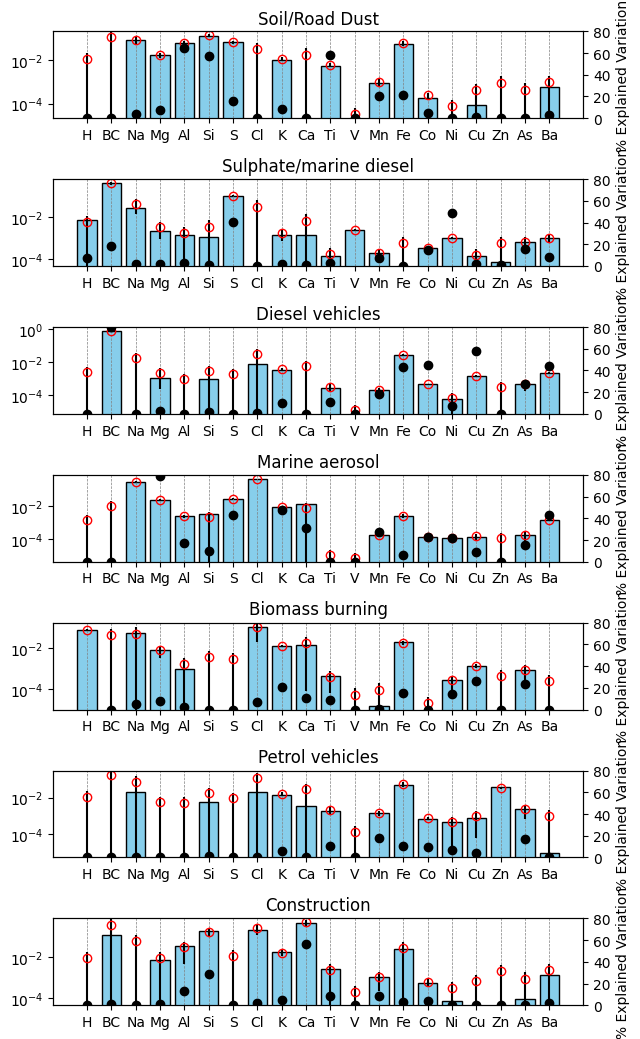

In [84]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Create a figure with seven subplots
fig, axs = plt.subplots(nrows=7, figsize=(6.5, 1.5 * 7))  # Adjust height for seven plots

plt.subplots_adjust(hspace=0.5)
# ----------------------- First Chart: Soil/Road Dust -----------------------
ax1 = axs[0]
ax1.set_title('Soil/Road Dust')
ax1.set_yscale('log')
ax1.set_yticks([10**-4, 10**-2, 10**0])
ax1.get_yaxis().set_major_formatter(ticker.LogFormatterMathtext())
bars1 = ax1.bar(df['Species'], df['Soils_C'], color='skyblue', edgecolor='black')
ax1.errorbar(df['Species'], df['Soils_A'],
             yerr=[df['Soils_A'] - df['Soils_error'], df['Soils_DISP'] - df['Soils_A']],
             fmt='o', ecolor='black', mfc='none', mec='red')
ax1.grid(axis='x', color='gray', linestyle='--', linewidth=0.5)
ax1_1 = ax1.twinx()
ax1_1.plot(df['Species'], df['Soils_E'], 'ko', mfc='black')
ax1_1.set_ylim(0, 80)
ax1_1.set_ylabel('% Explained Variation')
ax1_1.set_yticks(range(0, 81, 20))
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=0)

# ----------------------- Second Chart: Sulphate/marine diesel -----------------------
ax2 = axs[1]
ax2.set_title('Sulphate/marine diesel')
ax2.set_yscale('log')
ax2.set_yticks([10**-4, 10**-2, 10**0])
ax2.get_yaxis().set_major_formatter(ticker.LogFormatterMathtext())
bars2 = ax2.bar(df['Species'], df['Sulphate_C'], color='skyblue', edgecolor='black')
ax2.errorbar(df['Species'], df['Sulphate_A'],
             yerr=[df['Sulphate_A'] - df['Sulphate_error'], df['Sulphate_DISP'] - df['Sulphate_A']],
             fmt='o', ecolor='black', mfc='none', mec='red')
ax2.grid(axis='x', color='gray', linestyle='--', linewidth=0.5)
ax2_2 = ax2.twinx()
ax2_2.plot(df['Species'], df['Sulphate_E'], 'ko', mfc='black')
ax2_2.set_ylim(0, 80)
ax2_2.set_ylabel('% Explained Variation')
ax2_2.set_yticks(range(0, 81, 20))
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0)

# ----------------------- Third Chart: Diesel vehicles -----------------------
ax3 = axs[2]
ax3.set_title('Diesel vehicles')
ax3.set_yscale('log')
ax3.set_yticks([10**-4, 10**-2, 10**0])
ax3.get_yaxis().set_major_formatter(ticker.LogFormatterMathtext())
bars3 = ax3.bar(df['Species'], df['Diesel vehicles_C'], color='skyblue', edgecolor='black')
ax3.errorbar(df['Species'], df['Diesel vehicles_A'],
             yerr=[df['Diesel vehicles_A'] - df['Diesel vehicles_error'], df['Diesel vehicles_DISP'] - df['Diesel vehicles_A']],
             fmt='o', ecolor='black', mfc='none', mec='red')
ax3.grid(axis='x', color='gray', linestyle='--', linewidth=0.5)
ax3_3 = ax3.twinx()
ax3_3.plot(df['Species'], df['Diesel vehicles_E'], 'ko', mfc='black')
ax3_3.set_ylim(0, 80)
ax3_3.set_ylabel('% Explained Variation')
ax3_3.set_yticks(range(0, 81, 20))
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=0)

# ----------------------- Fourth Chart: Marine aerosol -----------------------
ax4 = axs[3]
ax4.set_title('Marine aerosol')
ax4.set_yscale('log')
ax4.set_yticks([10**-4, 10**-2, 10**0])
ax4.get_yaxis().set_major_formatter(ticker.LogFormatterMathtext())
bars4 = ax4.bar(df['Species'], df['Marine aerosol_C'], color='skyblue', edgecolor='black')
ax4.errorbar(df['Species'], df['Marine aerosol_A'],
             yerr=[df['Marine aerosol_A'] - df['Marine aerosol_error'], df['Marine aerosol_DISP'] - df['Marine aerosol_A']],
             fmt='o', ecolor='black', mfc='none', mec='red')
ax4.grid(axis='x', color='gray', linestyle='--', linewidth=0.5)
ax4_4 = ax4.twinx()
ax4_4.plot(df['Species'], df['Marine aerosol_E'], 'ko', mfc='black')
ax4_4.set_ylim(0, 80)
ax4_4.set_ylabel('% Explained Variation')
ax4_4.set_yticks(range(0, 81, 20))
plt.setp(ax4.xaxis.get_majorticklabels(), rotation=0)

# ----------------------- Fifth Chart: Biomass burning -----------------------
ax5 = axs[4]
ax5.set_title('Biomass burning')
ax5.set_yscale('log')
ax5.set_yticks([10**-4, 10**-2, 10**0])
ax5.get_yaxis().set_major_formatter(ticker.LogFormatterMathtext())
bars5 = ax5.bar(df['Species'], df['Biomass burning_C'], color='skyblue', edgecolor='black')
ax5.errorbar(df['Species'], df['Biomass burning_A'],
             yerr=[df['Biomass burning_A'] - df['Biomass burning_error'], df['Biomass burning_DISP'] - df['Biomass burning_A']],
             fmt='o', ecolor='black', mfc='none', mec='red')
ax5.grid(axis='x', color='gray', linestyle='--', linewidth=0.5)
ax5_5 = ax5.twinx()
ax5_5.plot(df['Species'], df['Biomass burning_E'], 'ko', mfc='black')
ax5_5.set_ylim(0, 80)
ax5_5.set_ylabel('% Explained Variation')
ax5_5.set_yticks(range(0, 81, 20))
plt.setp(ax5.xaxis.get_majorticklabels(), rotation=0)

# ----------------------- Sixth Chart: Petrol vehicles -----------------------
ax6 = axs[5]
ax6.set_title('Petrol vehicles')
ax6.set_yscale('log')
ax6.set_yticks([10**-4, 10**-2, 10**0])
ax6.get_yaxis().set_major_formatter(ticker.LogFormatterMathtext())
bars6 = ax6.bar(df['Species'], df['Petrol vehicles_C'], color='skyblue', edgecolor='black')
ax6.errorbar(df['Species'], df['Petrol vehicles_A'],
             yerr=[df['Petrol vehicles_A'] - df['Petrol vehicles_error'], df['Petrol vehicles_DISP'] - df['Petrol vehicles_A']],
             fmt='o', ecolor='black', mfc='none', mec='red')
ax6.grid(axis='x', color='gray', linestyle='--', linewidth=0.5)
ax6_6 = ax6.twinx()
ax6_6.plot(df['Species'], df['Petrol vehicles_E'], 'ko', mfc='black')
ax6_6.set_ylim(0, 80)
ax6_6.set_ylabel('% Explained Variation')
ax6_6.set_yticks(range(0, 81, 20))
plt.setp(ax6.xaxis.get_majorticklabels(), rotation=0)

# ----------------------- Seventh Chart: Construction -----------------------
ax7 = axs[6]
ax7.set_title('Construction')
ax7.set_yscale('log')
ax7.set_yticks([10**-4, 10**-2, 10**0])
ax7.get_yaxis().set_major_formatter(ticker.LogFormatterMathtext())
bars7 = ax7.bar(df['Species'], df['Construction_C'], color='skyblue', edgecolor='black')
ax7.errorbar(df['Species'], df['Construction_A'],
             yerr=[df['Construction_A'] - df['Construction_error'], df['Construction_DISP'] - df['Construction_A']],
             fmt='o', ecolor='black', mfc='none', mec='red')
ax7.grid(axis='x', color='gray', linestyle='--', linewidth=0.5)
ax7_7 = ax7.twinx()
ax7_7.plot(df['Species'], df['Construction_E'], 'ko', mfc='black')
ax7_7.set_ylim(0, 80)
ax7_7.set_ylabel('% Explained Variation')
ax7_7.set_yticks(range(0, 81, 20))
plt.setp(ax6.xaxis.get_majorticklabels(), rotation=0)


# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()
